<html>
<head>
	<title></title>
</head>
<body>
<h2 style="text-align: center;line-height: 120%;">ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ ВЫСШЕГО ОБРАЗОВАНИЯ НАЦИОНАЛЬНЫЙ ИССЛЕДОВАТЕЛЬСКИЙ УНИВЕРСИТЕТ «МОСКОВСКИЙ ЭНЕРГЕТИЧЕСКИЙ ИНСТИТУТ» Кафедра «РЗиАЭ»</h2>
<h2 style="text-align: center;line-height: 20%;">Лабораторная работа №3</h2>
<h3 style="text-align: center;line-height: 20%;">по курсу: «Методы решения задач оптимизации»</h3>

<h2 style="text-align: center;line-height: 80%;"><em>Динамическое программирование</em></h2>

<h4 style="text-align: center;line-height: 80%;"><em>Вариант №5</em></h4>

<h5 style="text-align: right;line-height: 40%;">Выполнил: студент группы Э-13м-21</h5>
<h5 style="text-align: right;line-height: 40%;">Груздов А.Г.</h5>

<h5 style="text-align: right;line-height: 40%;">Принял: Рогозинников Е.И.</p>
<h5 style="text-align: right;line-height: 40%;">Рыжков А.К.</p>
<h4 style="text-align: center;line-height: 100%;"><em> Москва, 2022</em></h3>
</body>
</html>

 Целью работы является получение практических навыков работы с методом решения задач динамического программирования.

Исходные данные, задание

Персональный энергоблок (ПЭБ) имеет в своём составе аккумуляторную батарею ёмкости 12500 Вт·ч и уровнем заряда 2700 Вт·ч. Цена на электроэнергию в тчении дня изменяется согласно почасовому графику, представленному в таблице 1, нагрузка потребителя, подключенного к ПЭБ, изменяется согласно почасовому графику, представленному в таблице 2, также подключен потребитель с постоянной нагрузкой 150 Вт·ч. ПЭБ способен каждый час либо заряжать свою аккумуляторную батарею (от 1 до 4 кВт·ч), покупая электроэнергию из сети, либо разряжать (от 1 до 4 Вт·ч) – продавая излишки электроэнергии в сеть, либо не производить торговых операцй вовсе. Необходимо спланировать график торговых операций на следующий день, имея перечисленную информацию, на каждый час так, чтобы суммарное вознаграждение к концу дня было максимальным, а оставшийся заряж аккумуляторной батареи был выше значения 7000 Вт·ч.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
# ==================================================Исходные данные=====================================================
# Вариант 5
# Емкость аккумуляторной батареи
capacity = 15000
# Начальный уровень заряда
initCapacity = 3200
actualCapacity = initCapacity
# Требуемое значение емкости на последнем часе
targetCapacity = 2000
# Постоянная нагрузка
loadConst = 170
# Изменение нагрузки потребителя
loadSched = [480, 320, 320, 360, 360, 360, 420, 920, 1200, 720, 680, 720, 800, 820, 960, 1200, 1380, 1380, 1520, 1800,
             1920, 1920, 1640, 1020]
# Изменение цены за электроэнергию в течение дня кВт*ч
priceSched = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 2, 3, 5, 5, 5, 4.5, 3, 3, 3, 3, 4.5, 5, 7, 9, 11, 12, 8, 4]
# Массив нагрузки по часам
load = [0] * 24
# ======================================================================================================================

In [3]:
# ======================================================================================================================
def function(i, change, actual, functionValue, string):
    if (i == 23):  # Заряд батареи должен быть равен требуемому значению емкости на последнем часе по условию
        targetCharge = targetCapacity
    else:  # Равно нагрузке следующего часа
        targetCharge = load[i + 1]

    # С фильтрацией
    # если заряд аккумуляторной батареи после применения данной операции не превышает значение максимальной ёмкости АБ; &&
    # если заряд аккумуляторной батареи после применения данной операции не меньше значения нагрузки следующего часа.
    if ((actual + change - load[i]) <= capacity) & ((actual + change - load[i]) >= targetCharge):
        if not string == "":
            var = "h" + str(i) + ";" + str(actual + change - load[i]) + ";" + string + "," + str(change)
        else:
            var = "h" + str(i) + ";" + str(actual + change - load[i]) + ";" + str(change)
        strings.append(var)
        hashTable[var] = functionValue - priceSched[i] * change

    # Без фильтрации
    # if not string == "":
    #     var = "h" + str(i) + ";" + str(actual + change - load[i]) + ";" + string + "," + str(change)
    # else:
    #     var = "h" + str(i) + ";" + str(actual + change - load[i]) + ";" + str(change)
    # strings.append(var)
    # hashTable[var] = functionValue - priceSched[i]*change
# ======================================================================================================================

In [4]:
# Заполним массив load, где храниться вся нагрузка на день
for i in range(len(loadSched)):
    load[i] = loadConst + loadSched[i]

# Исходная хэш-таблица
hashTable = dict()
# Ключ хэш-таблицы для тех случаев, которые удовлетворяют двум условиям
strings = []
# ======================================================================================================================

for i in range(24):

    if i == 0:
        # Цена нарастает для 1 часа
        function(i, +1000, initCapacity, 0, "")
        function(i, +2000, initCapacity, 0, "")
        function(i, +3000, initCapacity, 0, "")
        function(i, +4000, initCapacity, 0, "")
        function(i,     0, initCapacity, 0, "")
        function(i, -1000, initCapacity, 0, "")
        function(i, -2000, initCapacity, 0, "")
        function(i, -3000, initCapacity, 0, "")
        function(i, -4000, initCapacity, 0, "")

    if (i > 0) & (i < 24):
        # Заполняем массив значениям ,которые подходили под условия в функции function()
        localStrings = []
        for j in range(len(strings)):
            if ("h" + str(i - 1)) in strings[j]:
                localStrings.append(strings[j])

        #Cоздаем всё возможные варианты
        for j in range(len(localStrings)):
            data = localStrings[j].split(";")
            # значения остаточного заряда на батарее
            localActualCapacity = data[1]
            # значения целевой функции (цены), получаемые на данный час
            localFunctionValue = hashTable[localStrings[j]]
            # где data[2] это покупка\продажа ээ для конкретного часа.
            function(i, +1000, int(localActualCapacity), localFunctionValue, data[2])
            function(i, +2000, int(localActualCapacity), localFunctionValue, data[2])
            function(i, +3000, int(localActualCapacity), localFunctionValue, data[2])
            function(i, +4000, int(localActualCapacity), localFunctionValue, data[2])
            function(i,     0, int(localActualCapacity), localFunctionValue, data[2])
            function(i, -1000, int(localActualCapacity), localFunctionValue, data[2])
            function(i, -2000, int(localActualCapacity), localFunctionValue, data[2])
            function(i, -3000, int(localActualCapacity), localFunctionValue, data[2])
            function(i, -4000, int(localActualCapacity), localFunctionValue, data[2])

    if (i > 0) & (i < 24):

        localStrings = []
        for j in range(len(strings)):
            if ("h" + str(i)) in strings[j]:
                localStrings.append(strings[j])

        stringsForDelete = []

        # Алгоритм сравнения проигрышных вариантов (дубликатов и доминируемых строк)
        for j in range(len(localStrings) - 1):
            #емкость n-1 варианта
            chargeJ = int(localStrings[j].split(";")[1])
            for k in range(j + 1, len(localStrings)):
                # емкость n варианта
                chargeK = int(localStrings[k].split(";")[1])
                # Если емкость n-1 >= емкости n
                # Если значение целевой функции (цены) n-1 >= цены n
                if (chargeJ >= chargeK) & (hashTable[localStrings[j]] >= hashTable[localStrings[k]]):
                    # Проверка если такая же строка в списке на удаление, если нету, то следует удалить ключ значение n
                    if not localStrings[k] in stringsForDelete:
                        stringsForDelete.append(localStrings[k])

                if (chargeJ <= chargeK) & (hashTable[localStrings[j]] <= hashTable[localStrings[k]]):
                    # Проверка если такая же строка в списке на удаление, если нету, то следует удалить ключ значение n-1
                    if not localStrings[j] in stringsForDelete:
                        stringsForDelete.append(localStrings[j])
        # Алгоритм удаления проигрышных вариантов (дубликатов и [key,value] с наибольшим значением функции прибыли.)
        for j in range(len(stringsForDelete)):
            del hashTable[stringsForDelete[j]]
            strings.remove(stringsForDelete[j])
# ======================================================================================================================

In [5]:
# =================================Наиболее оптимальное значение целевой функции========================================
bestFunction = -1000000000000
bestFunctionLine = ""
bestFunctionCharge = ""
for i in range(len(strings)):
    if "h23" in strings[i]:
        if hashTable[strings[i]] > bestFunction:
            bestFunctionLine = strings[i].split(";")[2]
            bestFunction = hashTable[strings[i]]
            bestFunctionCharge = strings[i].split(";")[1]
# Выводим наиболее оптимальное значение целевой функции
print("  Функция прибыли: "   + str(bestFunction) +
      ", Торговые операции: " + bestFunctionLine +
      ", Заряд: "             + str(bestFunctionCharge))
# ======================================================================================================================

  Функция прибыли: -32500.0, Торговые операции: 4000,4000,-4000,-4000,4000,4000,4000,4000,-4000,-4000,-2000,1000,4000,4000,4000,4000,-4000,4000,4000,4000,-4000,-4000,2000,2000, Заряд: 2900


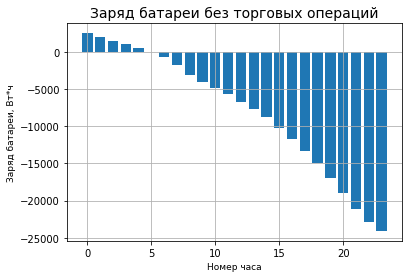

In [6]:
# =======================================Заряд батареи без торговых операций============================================
plt.figure("Histograms")
# Заряд батареии без торговых операций
x_axe = np.arange(0, 24, 1)
chargeWithoutTrading = np.zeros(24)
for i in range(24):
    if i == 0:
        chargeWithoutTrading[i] = initCapacity - load[i]
    else:
        chargeWithoutTrading[i] = chargeWithoutTrading[i - 1] - load[i]

plt.title("Заряд батареи без торговых операций", fontdict={'fontsize': 14})
plt.ylabel("Заряд батареи, Вт*ч", fontdict={'fontsize': 9})
plt.xlabel("Номер часа", fontdict={'fontsize': 9})
plt.bar(x_axe, chargeWithoutTrading)
plt.grid()
plt.show()

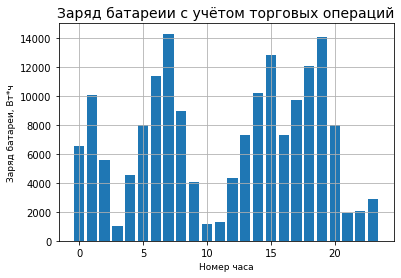

In [9]:
# =======================================Заряд батареи с учетом торговых операций=======================================
data = bestFunctionLine.split(",")
trades = np.zeros(len(data))
chargeWithTrading = np.zeros(24)
for i in range(24):
    if i == 0:
        chargeWithTrading[i] = initCapacity + (int)(data[i]) - load[i]
    else:
        chargeWithTrading[i] = chargeWithTrading[i - 1] + (int)(data[i]) - load[i]

plt.title("Заряд батареии с учётом торговых операций", fontdict={'fontsize': 14})
plt.ylabel("Заряд батареи, Вт*ч", fontdict={'fontsize': 9})
plt.xlabel("Номер часа", fontdict={'fontsize': 9})
plt.bar(x_axe, chargeWithTrading)
plt.grid()

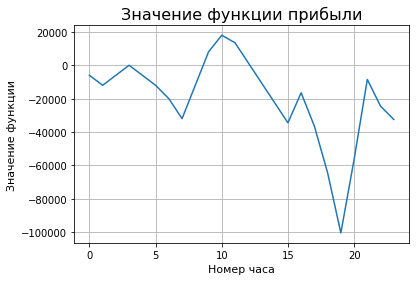

In [13]:
# =======================================Значение функции прибыли======================================================
plt.figure("Function value")
functionValue = np.zeros(len(priceSched))
for i in range(len(priceSched)):
    if i == 0:
        functionValue[i] = 0 - priceSched[i] * ((int)(data[i]))
    else:
        functionValue[i] = functionValue[i - 1] - priceSched[i] * ((int)(data[i]))

plt.title("Значение функции прибыли", fontdict={'fontsize': 16})
plt.ylabel("Значение функции", fontdict={'fontsize': 11})
plt.xlabel("Номер часа", fontdict={'fontsize': 11})
plt.plot(x_axe, functionValue)
plt.grid()
plt.show()